In [1]:
import pandas as pd
import sqlite3

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
query = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(query, connect, parse_dates=['timestamp'])
commits['weekday'] = commits['timestamp'].dt.dayofweek
commits['day'] = commits.timestamp.dt.day
commits['hour'] = commits.timestamp.dt.hour
commits['type'] = commits['weekday'].apply(
    lambda x: 'working_day' if x < 5 else 'weekend')
commits = commits.drop(columns = ['weekday'])
commits

,uid,timestamp,day,hour,type
0,user_4,2020-04-17 05:19:02.744528,17,5,working_day
1,user_4,2020-04-17 05:22:35.249331,17,5,working_day
2,user_4,2020-04-17 05:22:45.549397,17,5,working_day
3,user_4,2020-04-17 05:34:14.691200,17,5,working_day
4,user_4,2020-04-17 05:34:24.422370,17,5,working_day
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,21,20,working_day
3203,user_1,2020-05-21 20:22:41.785725,21,20,working_day
3204,user_1,2020-05-21 20:22:41.877806,21,20,working_day
3205,user_1,2020-05-21 20:37:00.129678,21,20,working_day


In [4]:
commits_groupped = commits.groupby(['type', 'day', 'hour']).count()
commits_groupped = commits_groupped.groupby(
    ['type', 'hour']).mean()['uid'].reset_index()
commits_groupped

,type,hour,uid
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [5]:
pivot_table = pd.pivot(commits_groupped,
                       values='uid',
                       index='hour',
                       columns='type')
pivot_table

type,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
3,1.000000,2.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


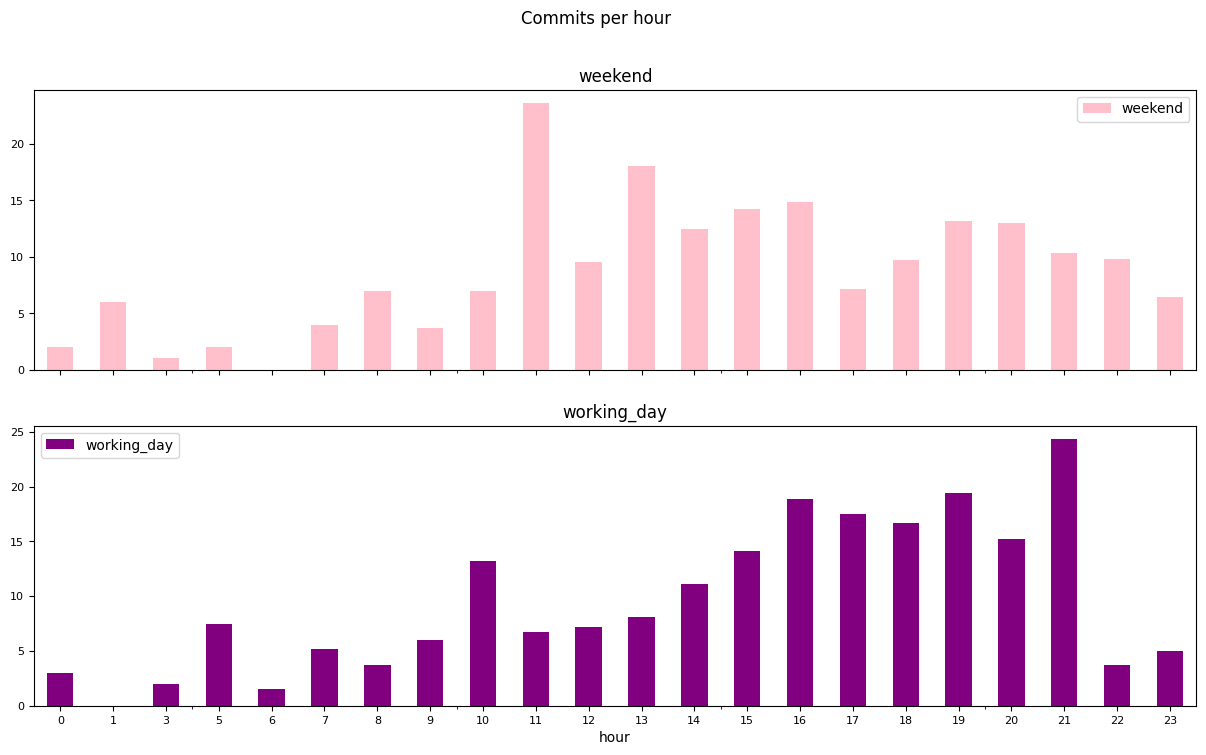

In [10]:
ax = pivot_table.plot(kind='bar',
                      figsize=(15, 8),
                      title='Commits per hour',
                      rot=0,
                      fontsize=8,
                      color=['pink', 'purple'],
                      subplots=True)

In [11]:
pivot_table[pivot_table['working_day'] == pivot_table['working_day'].max()]

type,weekend,working_day
hour,,
21,10.285714,24.333333


In [12]:
pivot_table[pivot_table['weekend'] == pivot_table['weekend'].max()]

type,weekend,working_day
hour,,
11,23.6,6.769231


In [13]:
connect.close()

Is the dynamic different on working days and weekends?

The answer is Yes. Working days have more commits at 9pm and weekend have more commits at 11am.